In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotting_tools as pt
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

def surface_brightness_plot_hist(array,label,bin_num=800,default=False):
    array = [row[9]+2.5*np.log10(2*np.pi*row[13]*row[13]) for row in array]
    n, bins = np.histogram(array,bins=bin_num,normed=default)
    plt.plot(bins[1:],n,label=label)
    return

# exploring the properties of galaxies through multidimensional statistical analysis techniques 
# vespa data, galaxy zoo data, sdss
# 0: stellar mass
# 1: error
# 2: SFR last 115 Myr
# 3: dustVal ISM
# 4: redshift
# 5: prob. elliptical
# 6: prob. spiral
# 7: u
# 8: g
# 9: r
# 10: i
# 11: z
# 12: petro r
# 13: theta

In [2]:
galaxies = np.load('/home/calum/Documents/Mphys_data/vespa_data/vespa_properties.npy')

In [3]:
x = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) for row in galaxies]
y = [row[7]-row[9] for row in galaxies]

In [4]:
y2 = [row[7]-row[9] for row in galaxies if row[2] > 0]

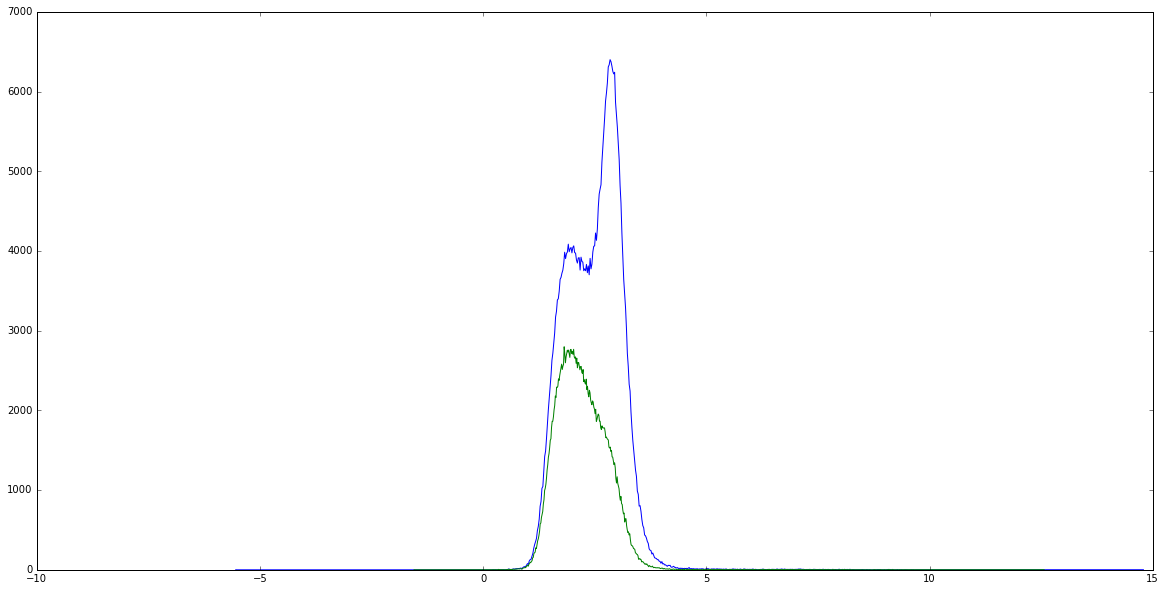

In [5]:
plt.figure(figsize=(20,10))
pt.plot_hist(y,1000,'galaxies',default=False)
pt.plot_hist(y2,1000,'galaxies',default=False)

In [6]:
# plot ellipticals
e_x = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) for row in galaxies if row[5] > 0.8]
e_y = [row[7]-row[9] for row in galaxies if row[5] > 0.8]

In [7]:
# plot spirals
s_x = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) for row in galaxies if row[6] > 0.8]
s_y = [row[7]-row[9] for row in galaxies if row[6] > 0.8]

(108035, 32373, 417270)

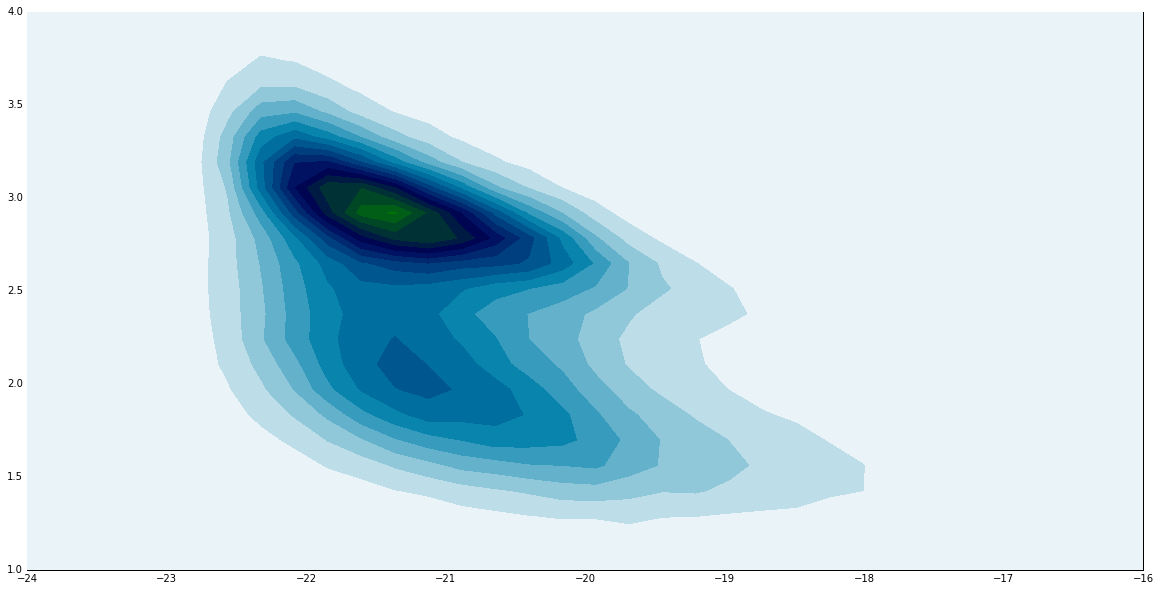

In [26]:
plt.figure(figsize=(20,10))
pt.plot_contour(x,y,bins=150,lines=20, fill=True, colours='ocean_r')
#pt.plot_contour(x,y2,bins=150,lines=20,colours='k')
#pt.plot_contour(e_x,e_y,bins=150,lines=15,colours='k')
#pt.plot_contour(s_x,s_y,bins=150,lines=10,colours='k')
plt.ylim(1,4)
plt.xlim(-24,-16)
len(s_y),len(e_x),len(x)

(-24, -16)

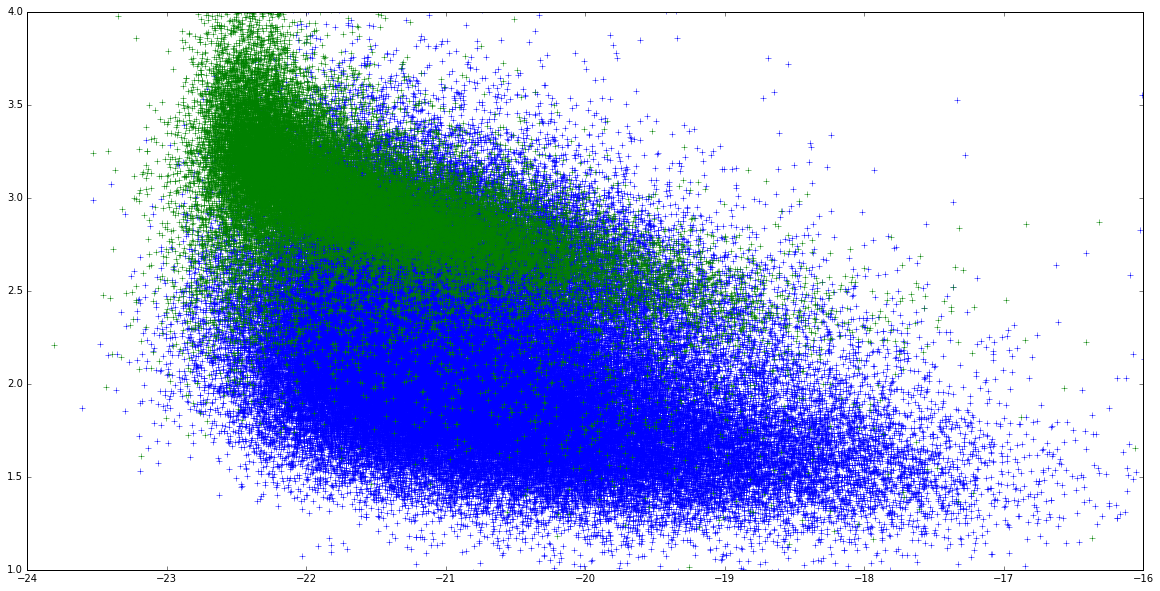

In [9]:
plt.figure(figsize=(20,10))
plt.plot(s_x,s_y,'+')
plt.plot(e_x,e_y,'+')
plt.ylim(1,4)
plt.xlim(-24,-16)

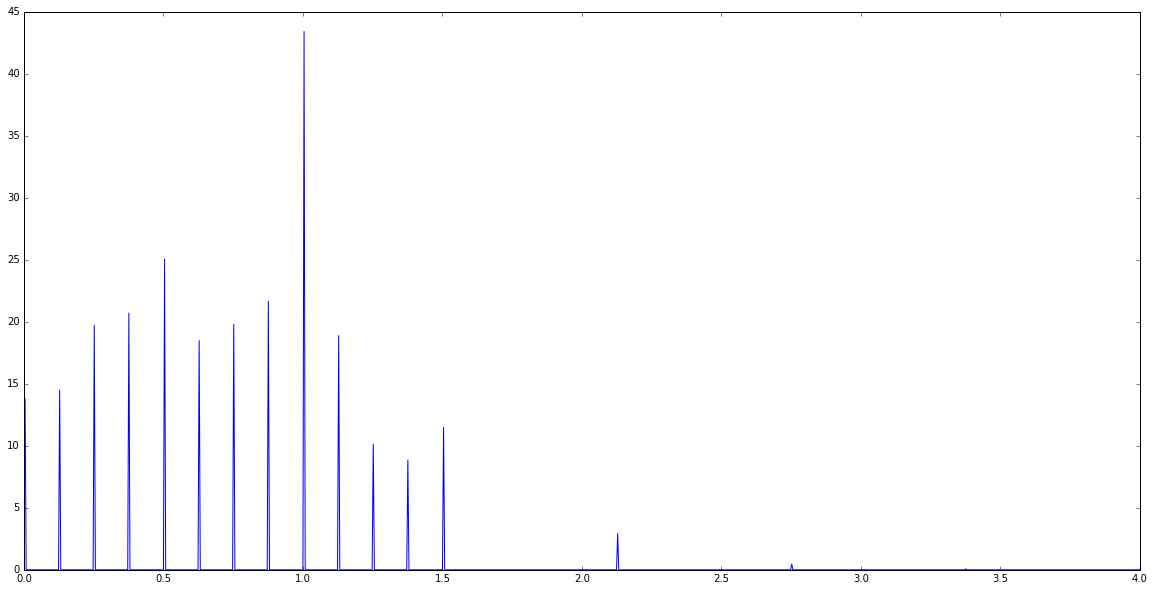

In [10]:
plt.figure(figsize=(20,10))
pt.plot_hist([row[3] for row in galaxies],bin_num=1000,label='SFR')
#plt.xlim(1e11,1e12)

In [11]:
# dusty
d_x = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) for row in galaxies if row[3] > 0.8]
d_y = [row[7]-row[9] for row in galaxies if row[3] > 0.8]
# not so dusty
ld_x = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) for row in galaxies if row[3] < 0.8]
ld_y = [row[7]-row[9] for row in galaxies if row[3] < 0.8]

(-24, -16)

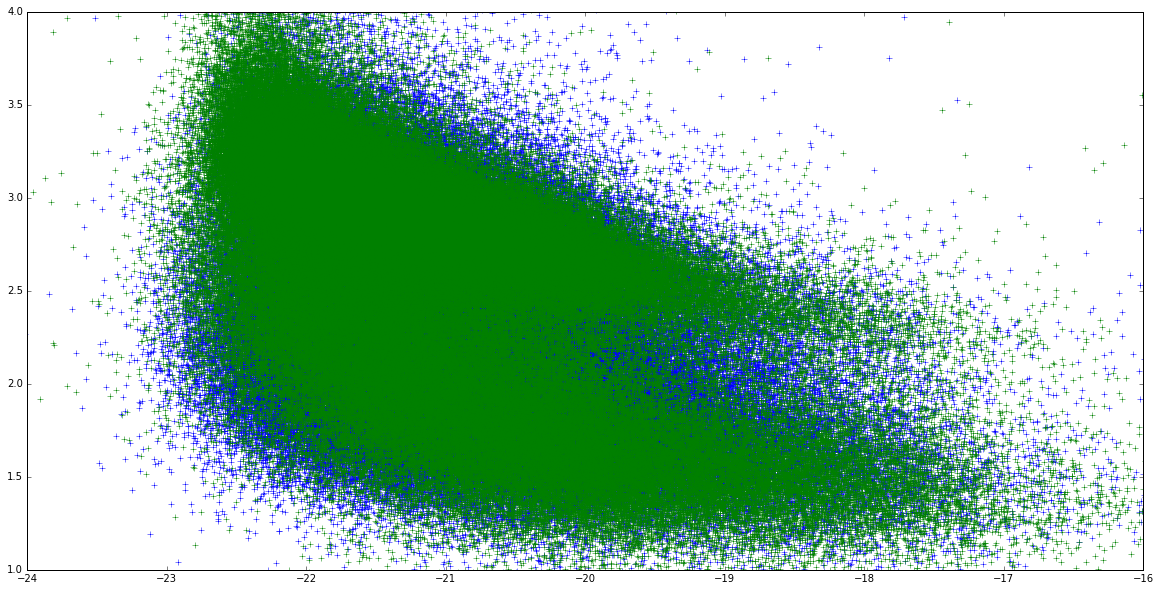

In [12]:
plt.figure(figsize=(20,10))
plt.plot(d_x,d_y,'+')
plt.plot(ld_x,ld_y,'+')
plt.ylim(1,4)
plt.xlim(-24,-16)

(108035, 32373, 417270)

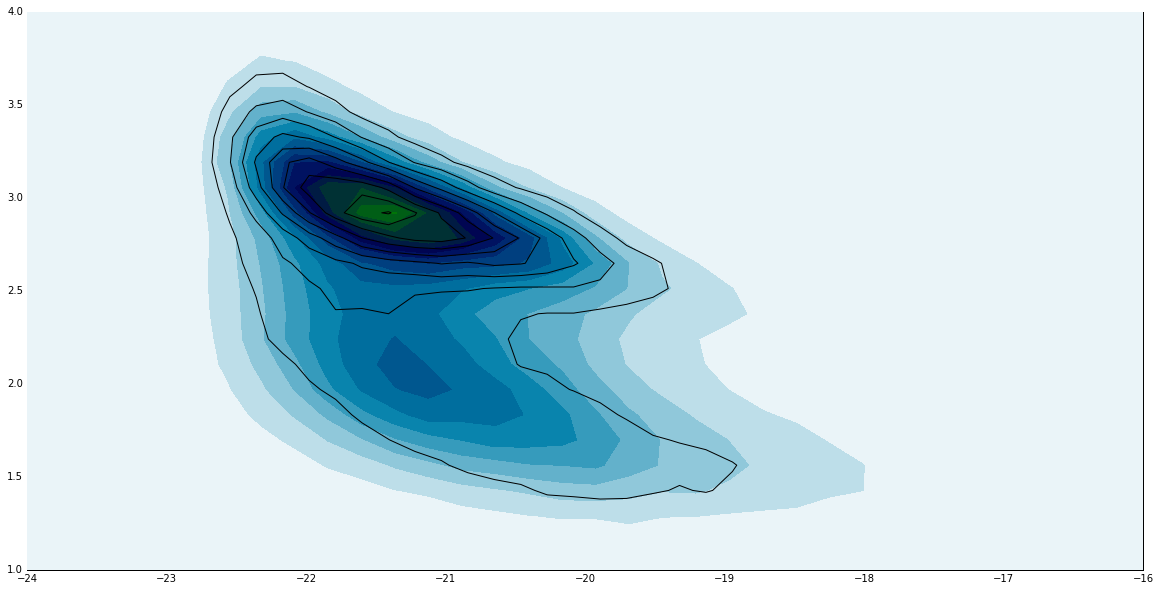

In [13]:
plt.figure(figsize=(20,10))
pt.plot_contour(x,y,bins=150,lines=20, fill=True, colours='ocean_r')
pt.plot_contour(ld_x,ld_y,bins=150,lines=10,colours='k')
#pt.plot_contour(d_x,d_y,bins=150,lines=10,colours='r')
plt.ylim(1,4)
plt.xlim(-24,-16)
len(s_y),len(e_x),len(x)

In [14]:
np.mean([row[3] for row in galaxies])

0.74853931507177607

In [15]:
np.mean([row[2] for row in galaxies]), np.mean([row[2] for row in galaxies if row[2] > 1.])

(50679216.088506065, 78033766.046306521)

In [16]:
# high sfr
hsfr_x = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) for row in galaxies if row[2] > 78033766.046306521]
hsfr_y = [row[7]-row[9] for row in galaxies if row[2] > 78033766.046306521]
# low sfr
lsfr_x = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) for row in galaxies if row[2] < 78033766.046306521 and row[2] >1.]
lsfr_y = [row[7]-row[9] for row in galaxies if row[2] < 78033766.046306521 and row[2] >1.]

(222404, 48593, 417270)

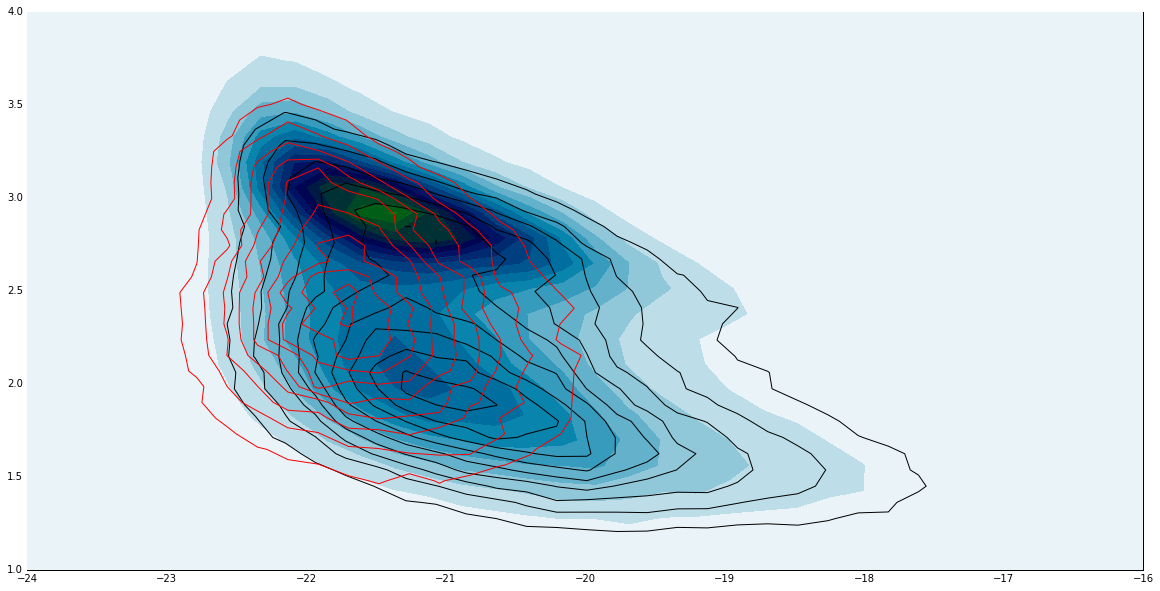

In [17]:
plt.figure(figsize=(20,10))
pt.plot_contour(x,y,bins=150,lines=20, fill=True, colours='ocean_r')
pt.plot_contour(lsfr_x,lsfr_y,bins=150,lines=10,colours='k')
pt.plot_contour(hsfr_x,hsfr_y,bins=150,lines=10,colours='r')
plt.ylim(1,4)
plt.xlim(-24,-16)
len(lsfr_y),len(hsfr_x),len(x)

(15, 25)

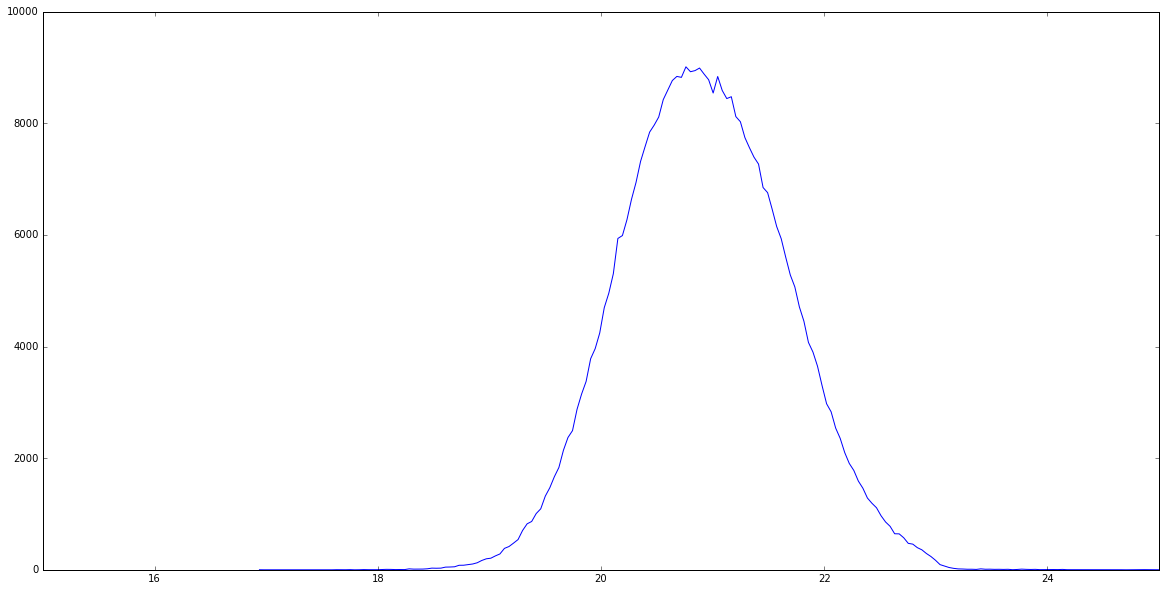

In [20]:
plt.figure(figsize=(20,10))
surface_brightness_plot_hist(galaxies,'galaxies')
plt.xlim(15,25)

In [21]:
# high surface brightness
hsb_x = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) 
         for row in galaxies if row[9]+2.5*np.log10(2*np.pi*row[13]*row[13]) < 21.]
hsb_y = [row[7]-row[9] for row in galaxies if row[9]+2.5*np.log10(2*np.pi*row[13]*row[13]) < 21.]
# low surface brightness
lsb_x = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) 
         for row in galaxies if row[9]+2.5*np.log10(2*np.pi*row[13]*row[13]) > 21.]
lsb_y = [row[7]-row[9] for row in galaxies if row[9]+2.5*np.log10(2*np.pi*row[13]*row[13]) > 21.]

(222404, 48593, 417270)

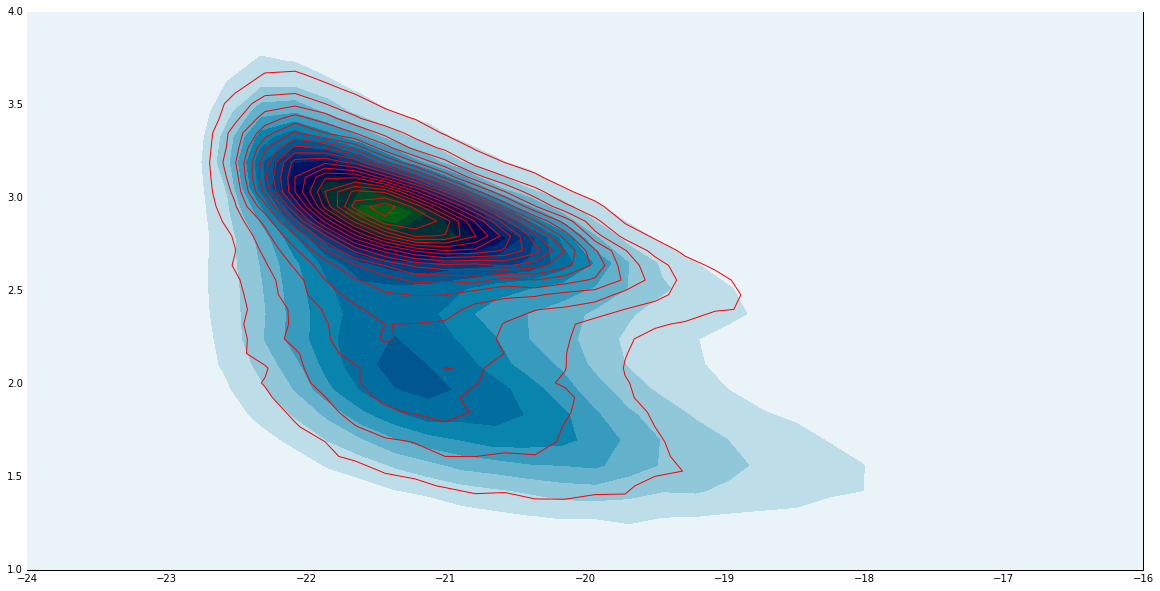

In [22]:
plt.figure(figsize=(20,10))
pt.plot_contour(x,y,bins=150,lines=20, fill=True, colours='ocean_r')
#pt.plot_contour(lsb_x,lsb_y,bins=150,lines=20,colours='k')
pt.plot_contour(hsb_x,hsb_y,bins=150,lines=20,colours='r')
plt.ylim(1,4)
plt.xlim(-24,-16)
len(lsfr_y),len(hsfr_x),len(x)

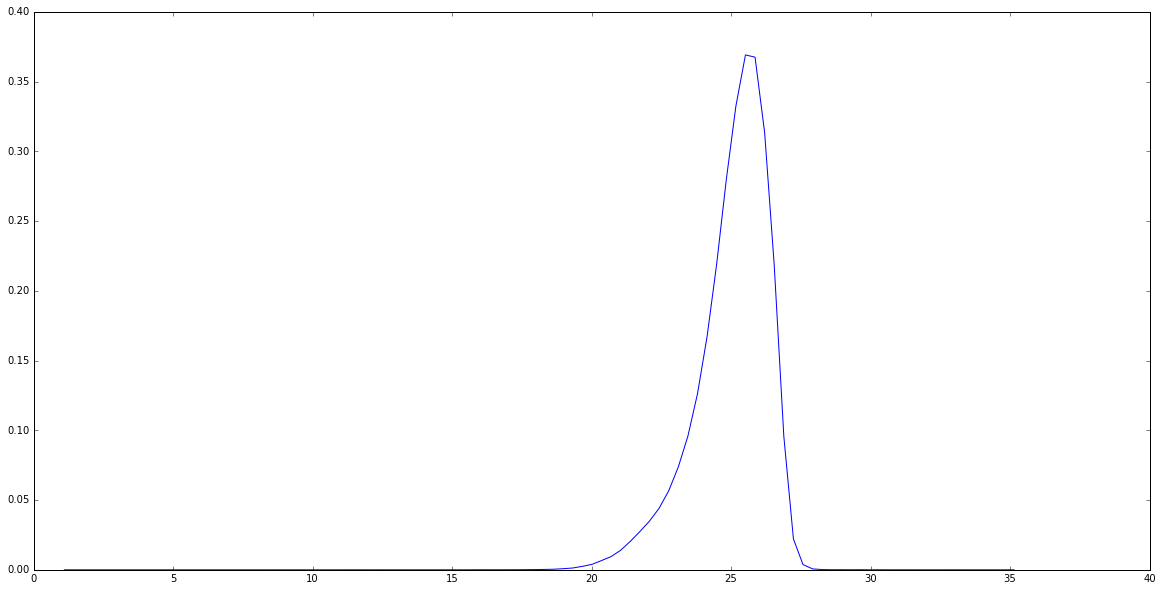

In [23]:
plt.figure(figsize=(20,10))
pt.plot_hist([np.log(row[0]) for row in galaxies],100,'galaxies')

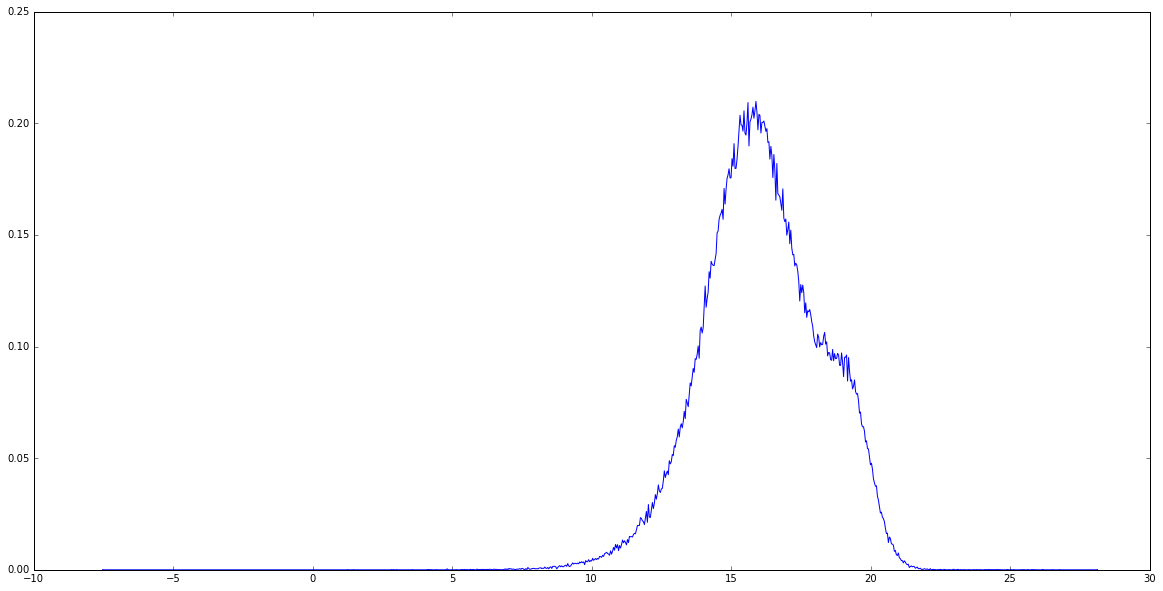

In [24]:
plt.figure(figsize=(20,10))
pt.plot_hist([np.log(row[2]) for row in galaxies if row[2]>0],1000,'galaxies')

In [25]:
len([row for row in galaxies if row[2] > 0.0])

270998